In [1]:
# Importing required libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading .csv file

train = pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape

(8523, 12)

In [4]:
train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [5]:
# Checking null values-
train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Counting null values-
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Removing null values is not recommended, We should handel those null values rather than removing them.

In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
for col in train.columns:
    print(f'{col}:')
    print(train[col].nunique())
    print(train[col].value_counts())
    print('\n\n')

Item_Identifier:
1559
FDW13    10
FDG33    10
FDG09     9
FDD38     9
FDV60     9
         ..
FDE52     1
DRF48     1
FDT35     1
FDQ60     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Weight:
415
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64



Item_Fat_Content:
5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Visibility:
7880
0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64



Item_Type:
16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649


### Benchmark

In [10]:
mrp = []
sales = []

for k,df in train.groupby(['Item_Type','Outlet_Type']):
    print('/n',k)
    print('Mean MRP: ',df['Item_MRP'].mean())
    mrp.append(df['Item_MRP'].mean())
    print('Mean Sales: ',df['Item_Outlet_Sales'].mean())
    sales.append(df['Item_Outlet_Sales'].mean())


/n ('Baking Goods', 'Grocery Store')
Mean MRP:  126.43806823529414
Mean Sales:  292.08254352941174
/n ('Baking Goods', 'Supermarket Type1')
Mean MRP:  125.97526150234759
Mean Sales:  2102.0212488262905
/n ('Baking Goods', 'Supermarket Type2')
Mean MRP:  126.38531470588238
Mean Sales:  1780.3687823529408
/n ('Baking Goods', 'Supermarket Type3')
Mean MRP:  128.80924347826087
Mean Sales:  3248.8724173913047
/n ('Breads', 'Grocery Store')
Mean MRP:  146.4528727272727
Mean Sales:  381.96744242424234
/n ('Breads', 'Supermarket Type1')
Mean MRP:  140.5675525
Mean Sales:  2346.928355
/n ('Breads', 'Supermarket Type2')
Mean MRP:  131.08900740740742
Mean Sales:  2022.4044888888889
/n ('Breads', 'Supermarket Type3')
Mean MRP:  145.67623870967745
Mean Sales:  3565.1227483870957
/n ('Breakfast', 'Grocery Store')
Mean MRP:  147.0269894736842
Mean Sales:  412.8310421052632
/n ('Breakfast', 'Supermarket Type1')
Mean MRP:  141.65657058823527
Mean Sales:  2228.334688235294
/n ('Breakfast', 'Supermarket 

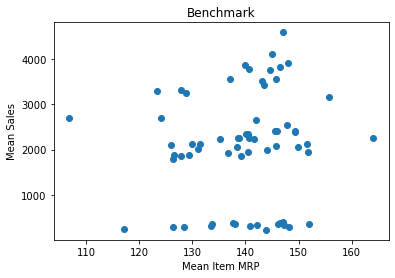

In [11]:
plt.scatter(mrp,sales)
plt.xlabel('Mean Item MRP')
plt.ylabel('Mean Sales')
plt.title('Benchmark')
plt.show()

### Steps for Data Preprocessing

#### 1) Data cleaning (If Data cleaning required)
#### 2) Missing value Imputation (If missing values are present)
#### 3) Feature engineering (If there is required)
#### 4) EDA Exploratory Data Analysis
#### 5) Outlier handling (If there are an outliers exist)
#### 6) Catagorical encoding (If there is catagorical variable/features)
#### 7) Data splits
#### 8) Feature scaling

### Data Cleansing

In [12]:
train['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
item_fat_content_dict = {'low fat':'Low Fat',
                        'LF':'Low Fat',
                        'Low Fat':'Low Fat',
                        'Regular':'Regular',
                        'reg':'Regular'}

In [15]:
# mapping

train['Item_Fat_Content'] = train['Item_Fat_Content'].map(item_fat_content_dict)

In [16]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Missing Value Imputation

In [17]:
train['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [18]:
train['Item_Weight'].isnull().sum()

1463

In [19]:
# Get avg and put in the null values so as to handel them

#### Mean imputation

In [20]:
# We Have created two seprated columns for mean and median in the df

In [21]:
# Calculating mean

print(f'Median :{train["Item_Weight"].median()}')

Median :12.6


In [22]:
# Filling null values with mean

train['Item_Weight_Mean'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [23]:
train['Item_Weight'].isnull().sum()

1463

In [24]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
dtype: int64

#### Median imputation

In [25]:
# calculating median

print(f'Median :{train["Item_Weight"].median()}')

Median :12.6


In [26]:
# Filling null values with median 

train['Item_Weight_Median'] = train['Item_Weight'].fillna(train['Item_Weight'].median())

In [27]:
train['Item_Weight'].isnull().sum()

1463

In [28]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
dtype: int64

#### Custom statistical imputation

In [29]:
# We make value dependent on another value
# process 1- find the groupped mean 

weight_dict = {}
for k,df in train.groupby(['Item_Type','Item_Fat_Content']):
    if df['Item_Weight'].isnull().sum()!=0:
        print(f"{k} :{df['Item_Weight'].isnull().sum()} : {df['Item_Weight'].shape[0]}")
        weight_dict[k] = df['Item_Weight'].mean()
        
weight_dict

('Baking Goods', 'Low Fat') :67 : 329
('Baking Goods', 'Regular') :45 : 319
('Breads', 'Low Fat') :27 : 140
('Breads', 'Regular') :20 : 111
('Breakfast', 'Low Fat') :7 : 41
('Breakfast', 'Regular') :14 : 69
('Canned', 'Low Fat') :55 : 341
('Canned', 'Regular') :55 : 308
('Dairy', 'Low Fat') :64 : 418
('Dairy', 'Regular') :52 : 264
('Frozen Foods', 'Low Fat') :75 : 450
('Frozen Foods', 'Regular') :63 : 406
('Fruits and Vegetables', 'Low Fat') :112 : 630
('Fruits and Vegetables', 'Regular') :101 : 602
('Hard Drinks', 'Low Fat') :31 : 214
('Health and Hygiene', 'Low Fat') :90 : 520
('Household', 'Low Fat') :151 : 910
('Meat', 'Low Fat') :38 : 170
('Meat', 'Regular') :50 : 255
('Others', 'Low Fat') :32 : 169
('Seafood', 'Low Fat') :8 : 37
('Seafood', 'Regular') :5 : 27
('Snack Foods', 'Low Fat') :127 : 692
('Snack Foods', 'Regular') :85 : 508
('Soft Drinks', 'Low Fat') :59 : 374
('Soft Drinks', 'Regular') :12 : 71
('Starchy Foods', 'Low Fat') :8 : 82
('Starchy Foods', 'Regular') :10 : 66


{('Baking Goods', 'Low Fat'): 12.552996183206107,
 ('Baking Goods', 'Regular'): 12.013302919708034,
 ('Breads', 'Low Fat'): 12.429911504424775,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705886,
 ('Breakfast', 'Regular'): 13.336181818181823,
 ('Canned', 'Low Fat'): 11.864650349650342,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811307,
 ('Frozen Foods', 'Low Fat'): 12.580333333333328,
 ('Frozen Foods', 'Regular'): 13.180539358600576,
 ('Fruits and Vegetables', 'Low Fat'): 12.757046332046352,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453134,
 ('Hard Drinks', 'Low Fat'): 11.400327868852452,
 ('Health and Hygiene', 'Low Fat'): 13.142313953488392,
 ('Household', 'Low Fat'): 13.384736495388726,
 ('Meat', 'Low Fat'): 13.565643939393933,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532842,
 ('Seafood', 'Low Fat'): 13.805344827586207,
 

In [30]:
weight_dict

{('Baking Goods', 'Low Fat'): 12.552996183206107,
 ('Baking Goods', 'Regular'): 12.013302919708034,
 ('Breads', 'Low Fat'): 12.429911504424775,
 ('Breads', 'Regular'): 10.002142857142857,
 ('Breakfast', 'Low Fat'): 11.849411764705886,
 ('Breakfast', 'Regular'): 13.336181818181823,
 ('Canned', 'Low Fat'): 11.864650349650342,
 ('Canned', 'Regular'): 12.804288537549407,
 ('Dairy', 'Low Fat'): 13.391497175141243,
 ('Dairy', 'Regular'): 13.483797169811307,
 ('Frozen Foods', 'Low Fat'): 12.580333333333328,
 ('Frozen Foods', 'Regular'): 13.180539358600576,
 ('Fruits and Vegetables', 'Low Fat'): 12.757046332046352,
 ('Fruits and Vegetables', 'Regular'): 13.708363273453134,
 ('Hard Drinks', 'Low Fat'): 11.400327868852452,
 ('Health and Hygiene', 'Low Fat'): 13.142313953488392,
 ('Household', 'Low Fat'): 13.384736495388726,
 ('Meat', 'Low Fat'): 13.565643939393933,
 ('Meat', 'Regular'): 12.335512195121952,
 ('Others', 'Low Fat'): 13.853284671532842,
 ('Seafood', 'Low Fat'): 13.805344827586207,
 

In [31]:
# Process2- find the null place and replce it with groupped mean

train['Item_Weight_Groupped_Mean']= train['Item_Weight']
for k,v in weight_dict.items():
    train.loc[(train['Item_Type'] == k[0]) & (train['Item_Fat_Content'] == k[1]) & (train['Item_Weight'].isna()), 'Item_Weight_Groupped_Mean']= v

In [32]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Groupped_Mean       0
dtype: int64

### Comparison of Imputation methods
 We plot the graph for mean imputation, median imputation, custom statistical imputation (and the graph which is close to the origin is best suited for our calculations)

In [33]:
var_original = train['Item_Weight'].var()

In [34]:
var_original

21.56168825983637

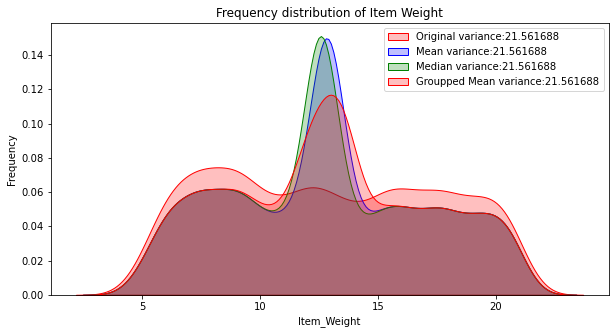

In [35]:
var_original = train['Item_Weight'].var()
var_mean = train['Item_Weight_Mean'].var()
var_median = train['Item_Weight_Median'].var()
var_gp_mean = train['Item_Weight_Groupped_Mean'].var()

fig = plt.figure(figsize=(10,5))
# Adding subplot
ax = fig.add_subplot(111)
ax = sns.kdeplot(train['Item_Weight'].dropna(), color='Red', shade=True, label='Original variance:%2f'%(var_original))
ax = sns.kdeplot(train['Item_Weight_Mean'], color='Blue', shade=True, label='Mean variance:%2f'%(var_original))
ax = sns.kdeplot(train['Item_Weight_Median'], color='Green', shade=True, label='Median variance:%2f'%(var_original))
ax = sns.kdeplot(train['Item_Weight_Groupped_Mean'], color='Red', shade=True, label='Groupped Mean variance:%2f'%(var_original))
ax.set_xlabel('Item_Weight')
ax.set_ylabel('Frequency')
ax.set_title('Frequency distribution of Item Weight')
ax.legend()
plt.show()

In [36]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Groupped_Mean       0
dtype: int64

#### Mode Imputation 
Mode works on occurance basis,If null values present in catagorical

In [37]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [38]:
print(f'Mode: ',train['Outlet_Size'].mode().values[0])

Mode:  Medium


In [39]:
train['Outlet_Size_Mode'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0])

In [40]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Groupped_Mean       0
Outlet_Size_Mode                0
dtype: int64

In [41]:
# Custom Mode Imputation
train['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [42]:
size_dict = {}
for k,df in train.groupby(['Outlet_Type']):
    if df['Outlet_Size'].isnull().sum() != 0:
        print(f"{k} : {df['Outlet_Size'].isnull().sum()} : {df['Outlet_Size'].shape[0]}")
        size_dict[k] = df['Outlet_Size'].mode().values[0]

Grocery Store : 555 : 1083
Supermarket Type1 : 1855 : 5577


In [43]:
size_dict

{'Grocery Store': 'Small', 'Supermarket Type1': 'Small'}

In [44]:
train['Outlet_Size_Groupped_Mode']= train['Outlet_Size']
for k,v in weight_dict.items():
    train.loc[(train['Outlet_Type'] == k) & (train['Outlet_Size'].isna()), 'Outlet_Size_Groupped_Mode']= v

In [45]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Mean                0
Item_Weight_Median              0
Item_Weight_Groupped_Mean       0
Outlet_Size_Mode                0
Outlet_Size_Groupped_Mode    2410
dtype: int64

In [46]:
# save missing data imputation information
missing_dict = {'Item_Weight': weight_dict,
               'Outlet_Size': size_dict}

### Exploratory Data Analysis

In [47]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Mean,Item_Weight_Median,Item_Weight_Groupped_Mean,Outlet_Size_Mode,Outlet_Size_Groupped_Mode
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30,Medium,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92,Medium,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50,Medium,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20,Medium,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93,High,High


In [48]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_Mean',
       'Item_Weight_Median', 'Item_Weight_Groupped_Mean', 'Outlet_Size_Mode',
       'Outlet_Size_Groupped_Mode'],
      dtype='object')

In [49]:
# Dividing numeric columns and categorical columns

num_cols = ['Item_Weight_Groupped_Mean','Item_Visibility','Item_MRP',]
cat_cols = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size_Groupped_Mode','Outlet_Location_Type','Outlet_Type']

target = 'Item_Outlet_Sales'

#### Analysis:

1) Univariate: Continuous, Categorical
2) Bivariate: Continuous & Catagorical
3) Multivariate: num_cols + target, cat_cols + target

#### Univariate Analysis:
Continuous Data/num_cols -> pd.describe() -> distribution -> (distplot,kdeplot),skeweness

Categorical Data/Cat_cols -> value.counts() -> distribution -> (countplot,boxplot),outliiers

In [50]:
# Continuous
train[num_cols].describe()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP
count,8523.000000,8523.000000,8523.000000
mean,12.860708,0.066132,140.992782
std,4.237815,0.051598,62.275067
min,4.555000,0.000000,31.290000
25%,9.310000,0.026989,93.826500
50%,12.800000,0.053931,143.012800
75%,16.000000,0.094585,185.643700
max,21.350000,0.328391,266.888400


C:\Users\MY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

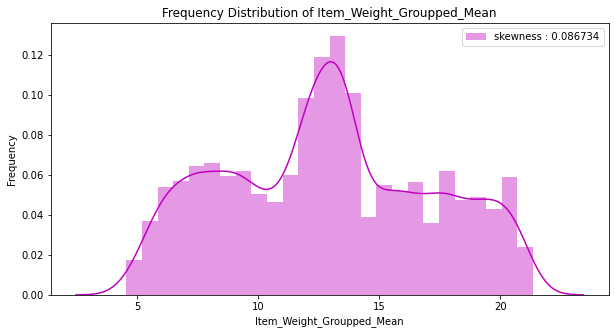

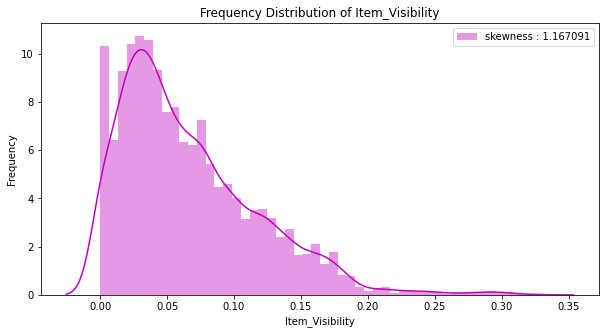

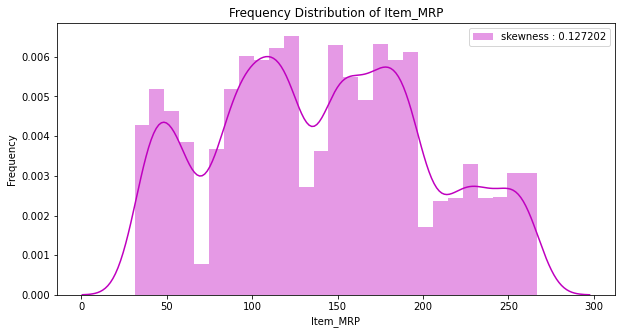

In [51]:
for col in num_cols:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(train[col],color='m',label='skewness : %2f'%(train[col].skew())) # We can use kdeplot as well
    ax.legend()
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution of {col}')

In [52]:
# Categorical
for col in cat_cols:
    print(f'\n{col}\n')
    print(train[col].value_counts())


Item_Fat_Content

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Establishment_Year

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Outlet_Size_Groupped_Mode

Medium    2793
Small     2388
High       932
Name: Outlet_Size_Groupped_Mode, dtype: int64

Outlet_Location_Type

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet

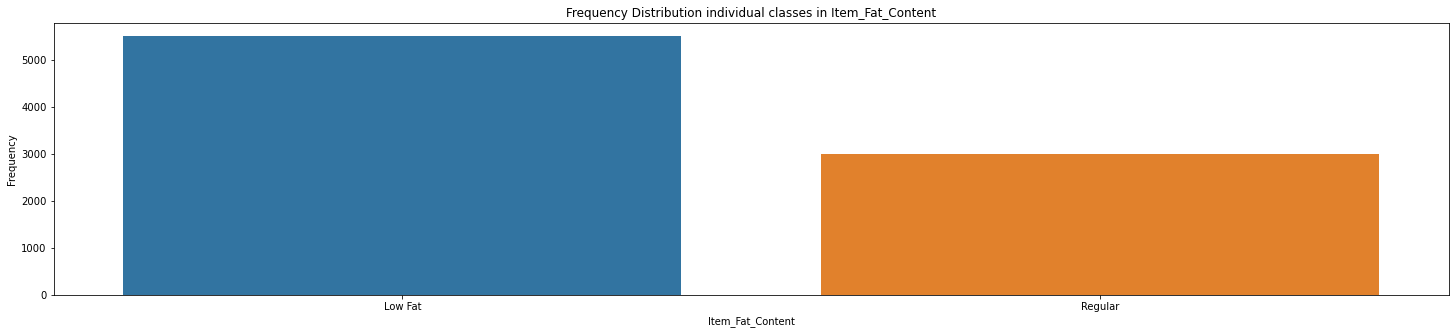

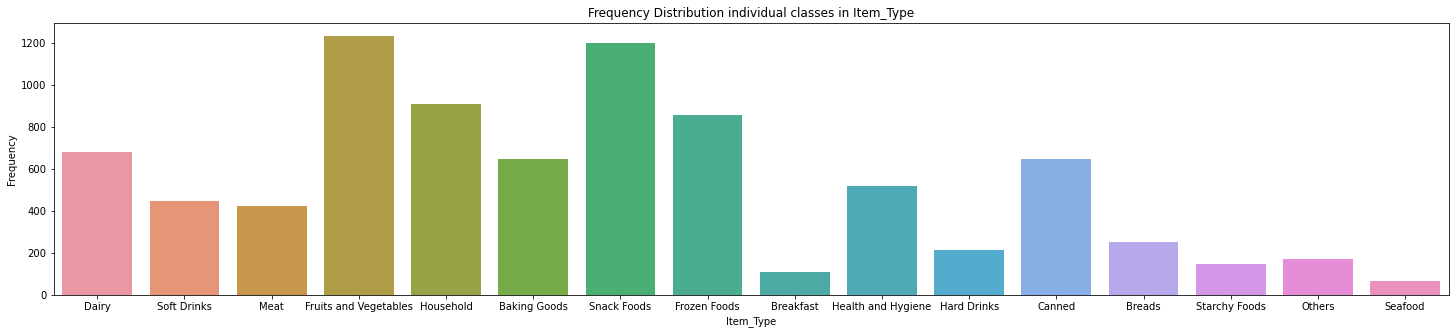

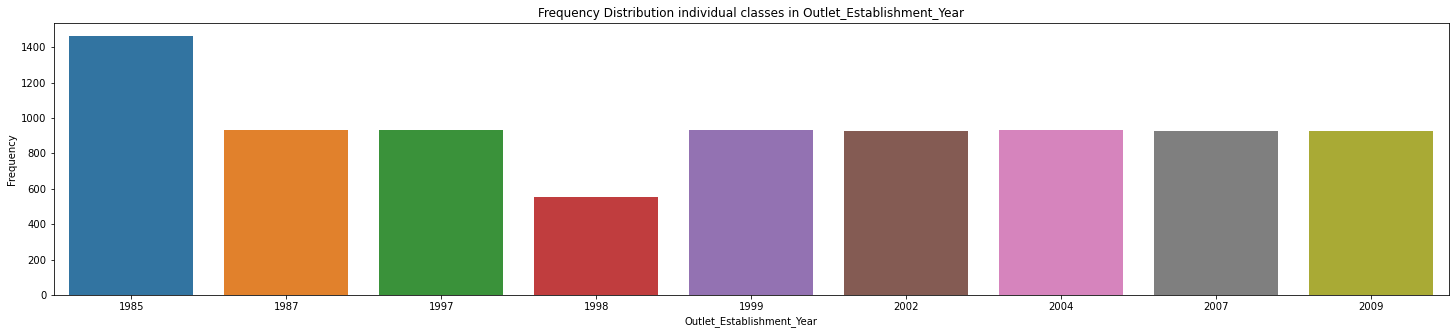

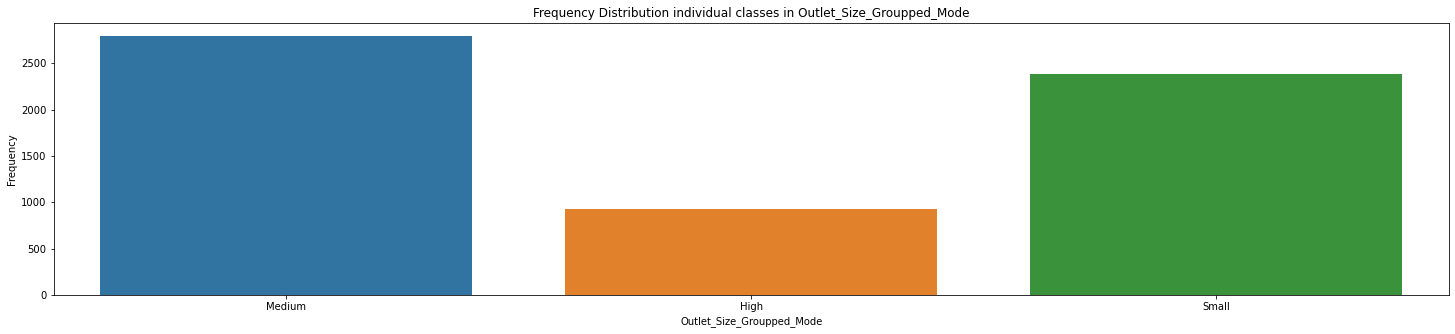

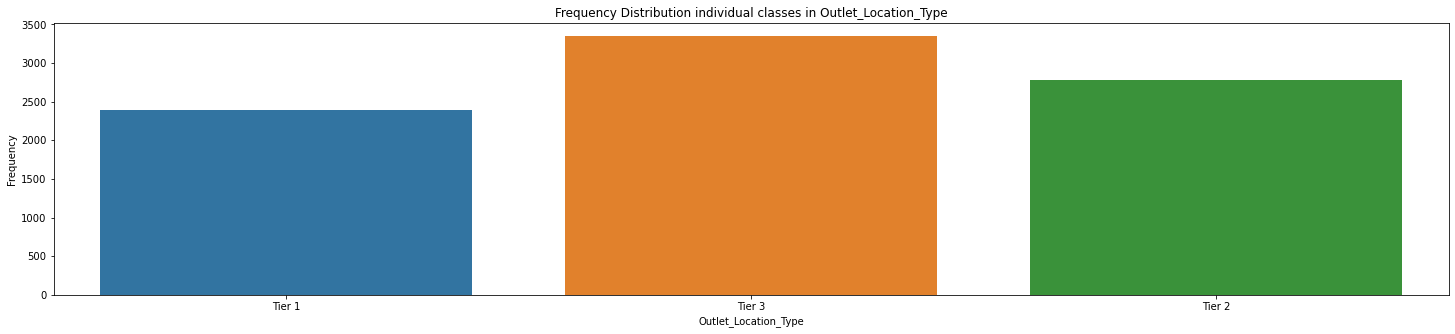

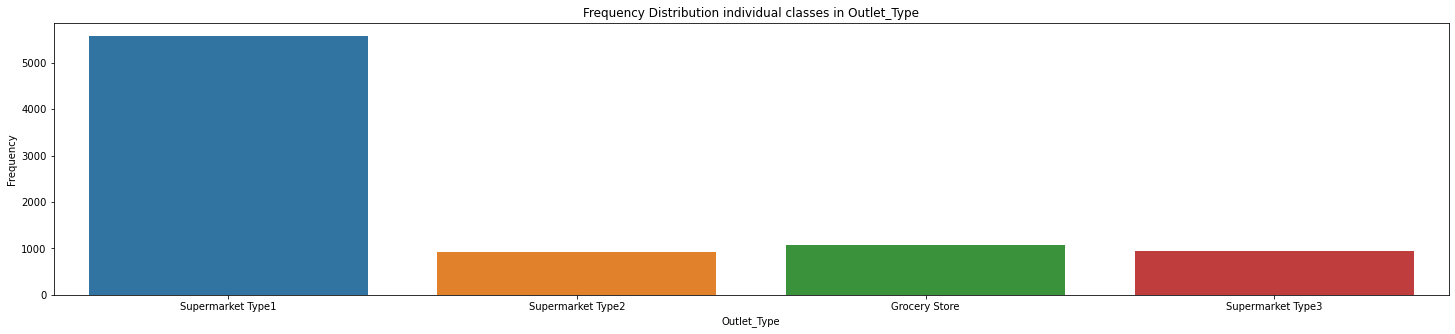

In [53]:
for col in cat_cols:
    fig = plt.figure(figsize=(25,5))
    ax = fig.add_subplot(111)
    sns.countplot(x=col,data=train,ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution individual classes in {col}')
    

#### Bivariate Analysis:
Continuous vs Continuous -> pairplot

Continuous vs Categorical -> boxplot

Categorical vs Categorical -> heatmap


In [54]:
num_cols

['Item_Weight_Groupped_Mean', 'Item_Visibility', 'Item_MRP']

In [55]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Size_Groupped_Mode',
 'Outlet_Location_Type',
 'Outlet_Type']

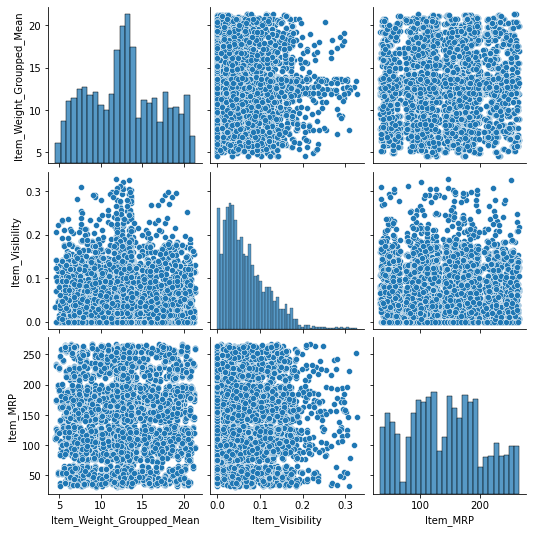

In [56]:
# Continuous vs Continuous-
sns.pairplot(train[num_cols])
plt.show()

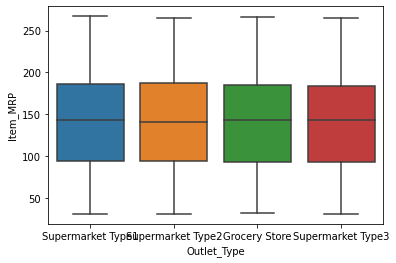

In [57]:
# Continuous vs Categorical:
sns.boxplot(x = train['Outlet_Type'],y=train['Item_MRP'],data = train)
plt.show()

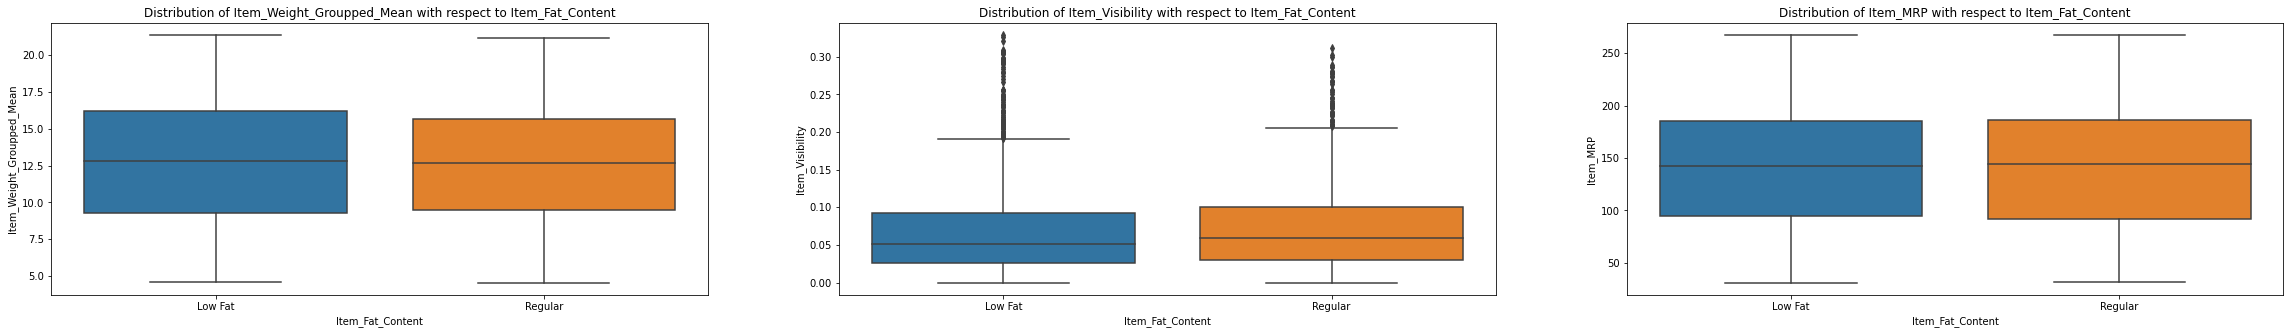

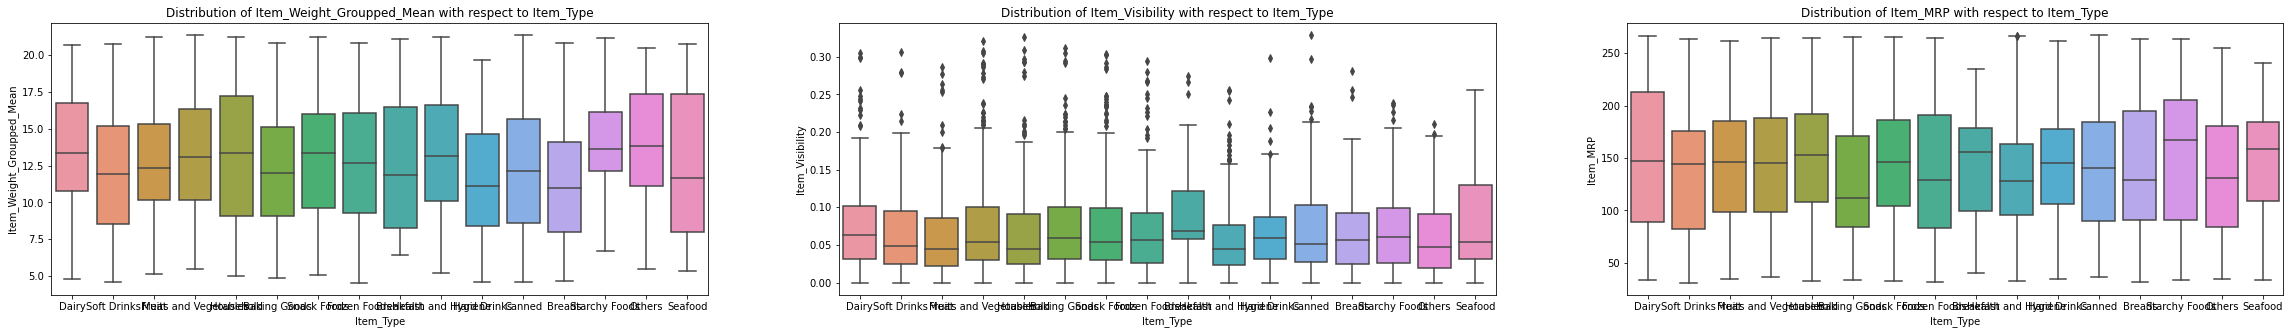

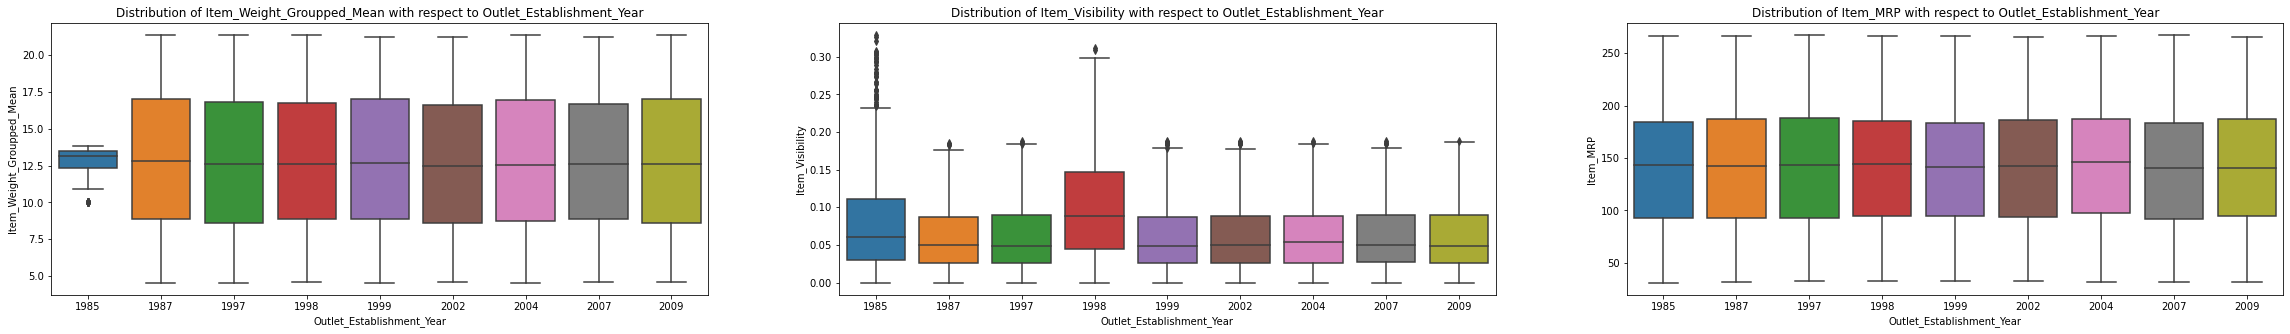

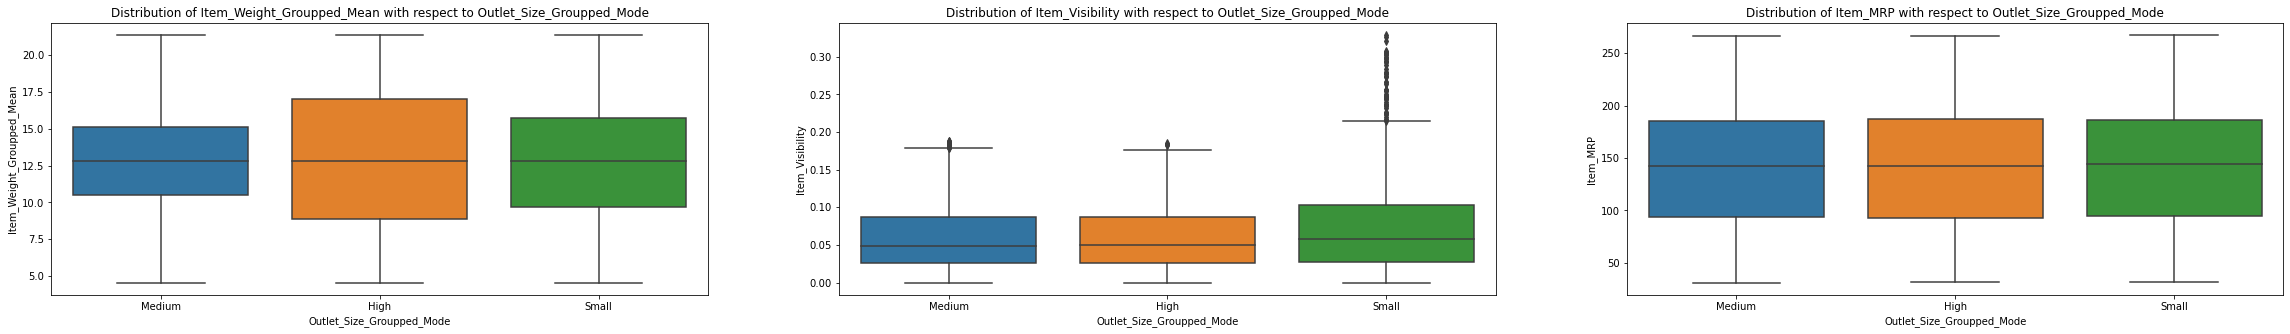

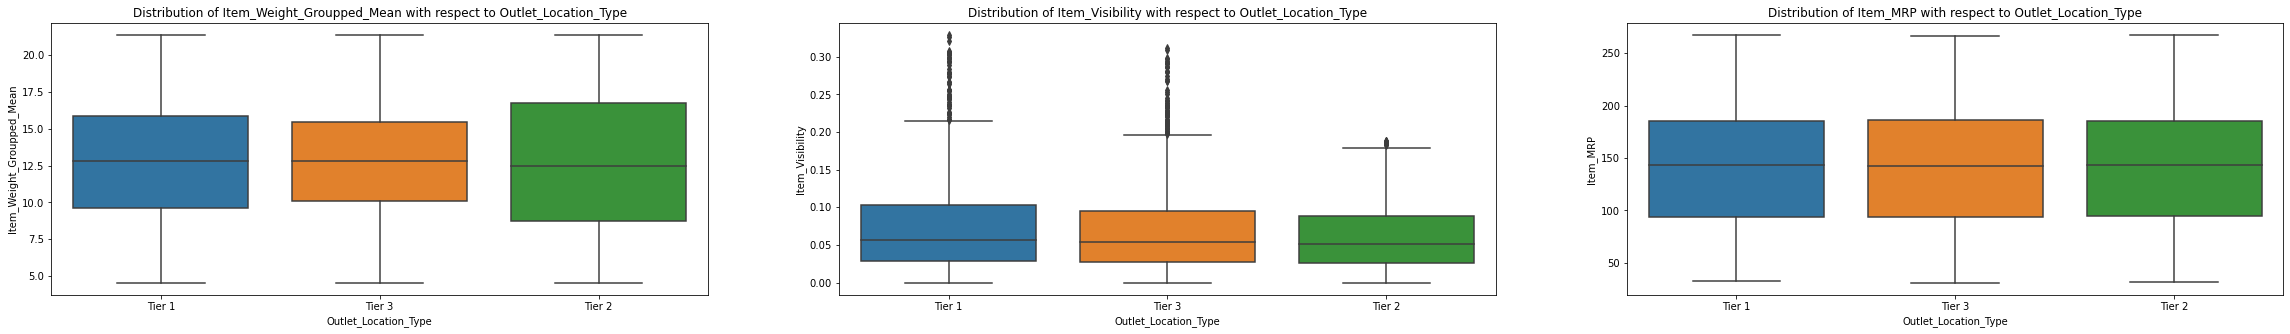

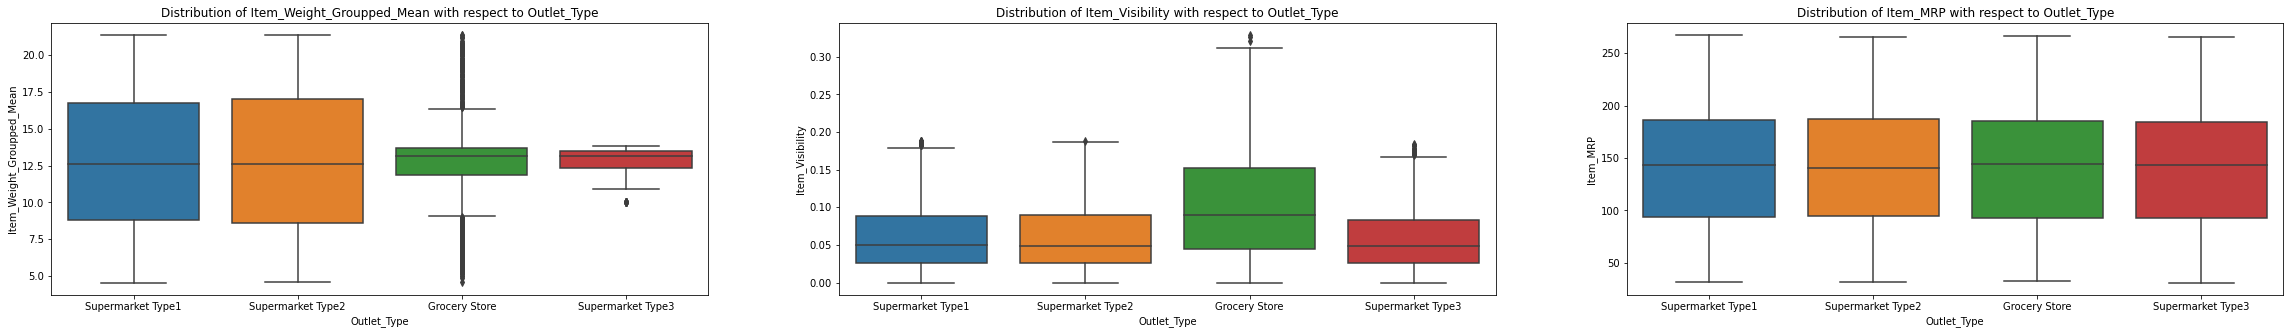

In [58]:
for cat_col in cat_cols:
    fig = plt.figure(figsize=(40,5))
    j=1
    for num_col in num_cols:
        ax = fig.add_subplot(1,len(num_cols),j)
        sns.boxplot(y= num_col, x= cat_col, data= train, ax= ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title(f'Distribution of {num_col} with respect to {cat_col}')
        j = j+1

In [155]:
# Heatmap

pivot = pd.pivot_table(train,columns=cat_cols,aggfunc='count')
pivot

Item_Fat_Content                    Low Fat                                  \
Item_Type                      Baking Goods                                   
Outlet_Establishment_Year              1985                            1987   
Outlet_Size_Groupped_Mode            Medium         Small              High   
Outlet_Location_Type                 Tier 3        Tier 1            Tier 3   
Outlet_Type               Supermarket Type3 Grocery Store Supermarket Type1   
Item_Identifier                          39            28                35   
Item_MRP                                 39            28                35   
Item_Outlet_Sales                        39            28                35   
Item_Visibility                          39            28                35   
Item_Weight                               0             0                35   
Item_Weight_Groupped_Mean                39            28                35   
Item_Weight_Mean                         39            28                35   
Item_Weight_Median                       39            28                35   
Outlet_Identifier                        39            28                35   
Outlet_Size                              39            28                35   
Outlet_Size_Mode                         39            28                35   

Item_Fat_Content                                               \
Item_Type                                                       
Outlet_Establishment_Year              1997              1999   
Outlet_Size_Groupped_Mode             Small            Medium   
Outlet_Location_Type                 Tier 1            Tier 1   
Outlet_Type               Supermarket Type1 Supermarket Type1   
Item_Identifier                          38                29   
Item_MRP                                 38                29   
Item_Outlet_Sales                        38                29   
Item_Visibility                          38                29   
Item_Weight                              38                29   
Item_Weight_Groupped_Mean                38                29   
Item_Weight_Mean                         38                29   
Item_Weight_Median                       38                29   
Outlet_Identifier                        38                29   
Outlet_Size                              38                29   
Outlet_Size_Mode                         38                29   

Item_Fat_Content                                               \
Item_Type                                                       
Outlet_Establishment_Year              2004              2009   
Outlet_Size_Groupped_Mode             Small            Medium   
Outlet_Location_Type                 Tier 2            Tier 3   
Outlet_Type               Supermarket Type1 Supermarket Type2   
Item_Identifier                          35                34   
Item_MRP                                 35                34   
Item_Outlet_Sales                        35                34   
Item_Visibility                          35                34   
Item_Weight                              35                34   
Item_Weight_Groupped_Mean                35                34   
Item_Weight_Mean                         35                34   
Item_Weight_Median                       35                34   
Outlet_Identifier                        35                34   
Outlet_Size                              35                34   
Outlet_Size_Mode                         35                34   

Item_Fat_Content                                                             \
Item_Type                            Breads                                   
Outlet_Establishment_Year              1985                            1987   
Outlet_Size_Groupped_Mode            Medium         Small              High   
Outlet_Location_Type                 Tier 3        Tier 1            Tier 3   
Outlet_Type               Supermarket Type3 Groce

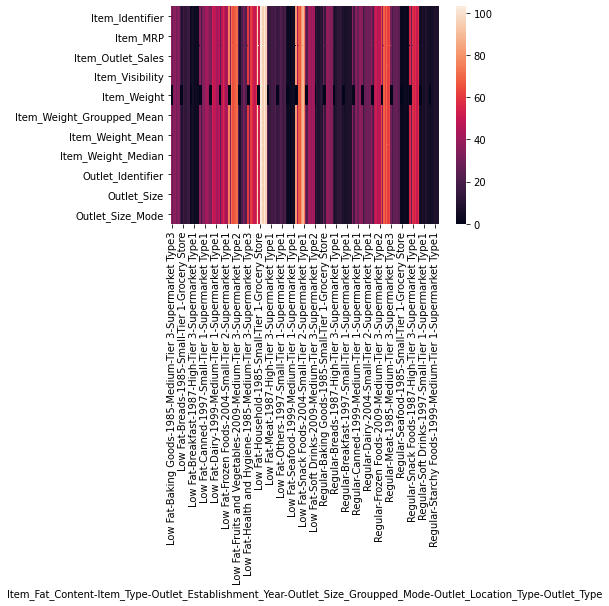

In [157]:
sns.heatmap(pivot)
plt.show()

#### Multivariate Analysis

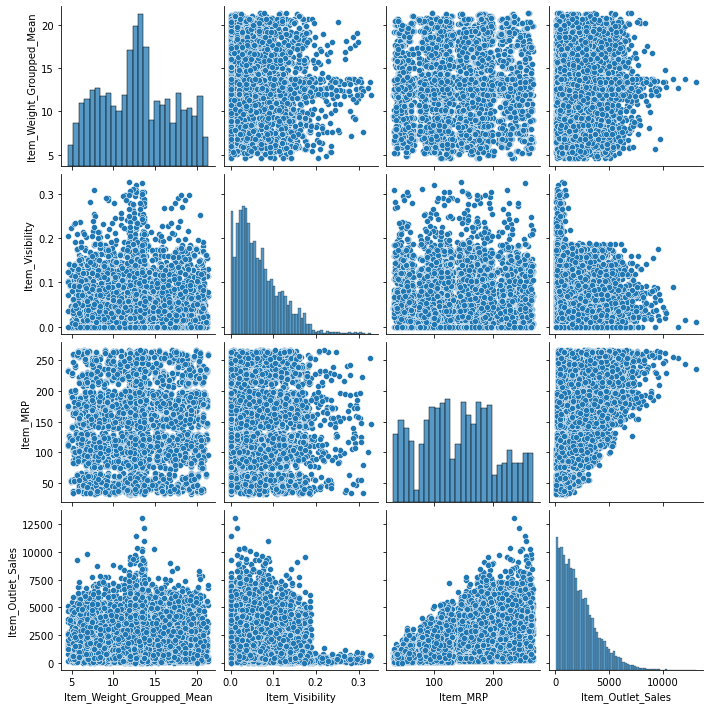

In [153]:
# num_cols + target

sns.pairplot(train[num_cols + [target]])
plt.show()

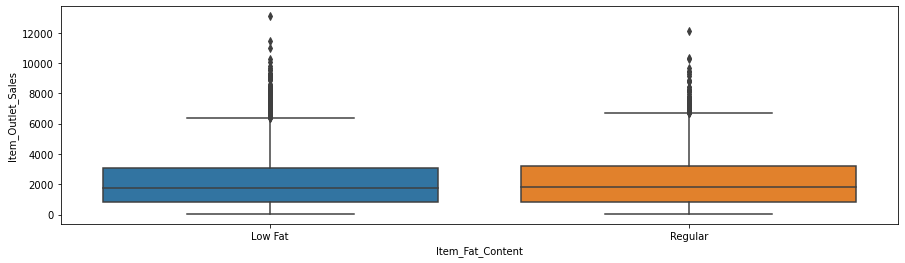

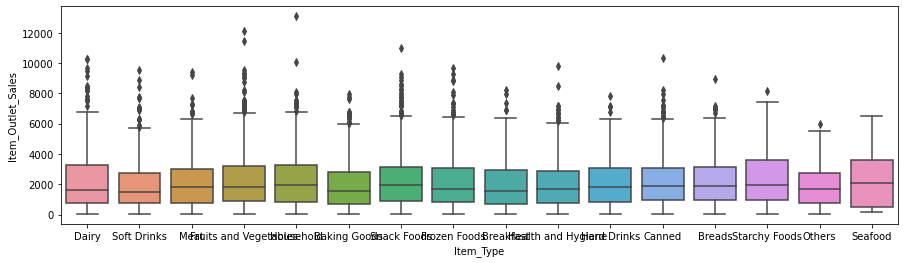

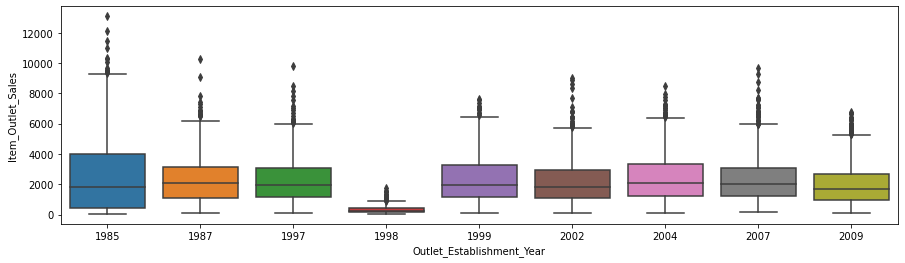

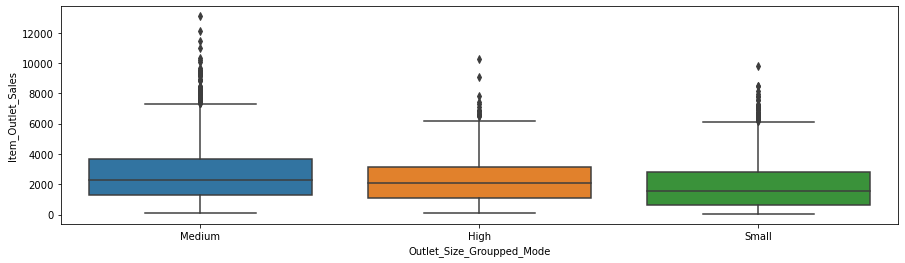

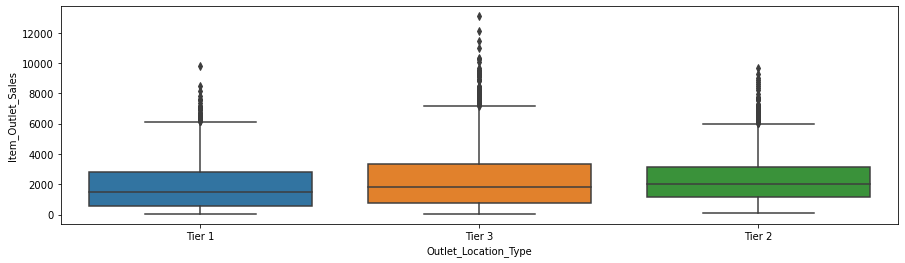

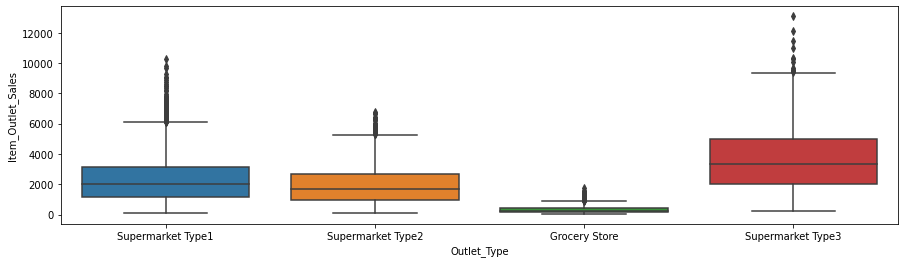

In [154]:
# cat_cols + target

for cat_col in cat_cols:
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    sns.boxplot(y =target,
               x =cat_col,
               data =train,
               ax=ax)

### Outliers Handling

In [59]:
def handel_outliers(df,var,tol):
    var_data = df[var].values
    q25 = np.percentile(var_data, 25)
    q75 = np.percentile(var_data, 75)
    
    print('Outlier Handling for {}'.format(var))
    print('Quartile 25: {} | Quartile 75: {}'.format(q25,q75))
    
    iqr = q75 - q25
    print(f'IQR: {iqr}')
    
    cutoff = iqr*tol
    lower = q25 - cutoff
    upper = q75 + cutoff
    
    print('cutoff: {}'.format(cutoff))
    print(f'{var} lower: {lower}')
    print(f'{var} upper: {upper}')
    
    outliers = [x for x in var_data if x < lower or x > upper]
    print(f'Number of Outliers un feature {var}: {len(outliers)}')
    print(f'{var} outliers: {outliers}')
    
    print('---'*25)
    print('\n\n')
    
    return list(df[(df[var] > upper) | (df[var] < lower)].index)



In [60]:
train_data = train.copy() # This is Deep copy since we dont want to change original data

In [61]:
train.shape

(8523, 17)

In [62]:
train_data.shape

(8523, 17)

In [63]:
outliers = []
for num_col in num_cols:
    outliers.extend(handel_outliers(train_data,num_col,1.5))
outliers = list(set(outliers))

train_data=train_data.drop(outliers)

Outlier Handling for Item_Weight_Groupped_Mean
Quartile 25: 9.31 | Quartile 75: 16.0
IQR: 6.6899999999999995
cutoff: 10.035
Item_Weight_Groupped_Mean lower: -0.7249999999999996
Item_Weight_Groupped_Mean upper: 26.035
Number of Outliers un feature Item_Weight_Groupped_Mean: 0
Item_Weight_Groupped_Mean outliers: []
---------------------------------------------------------------------------



Outlier Handling for Item_Visibility
Quartile 25: 0.0269894775 | Quartile 75: 0.0945852925
IQR: 0.067595815
cutoff: 0.1013937225
Item_Visibility lower: -0.07440424500000001
Item_Visibility upper: 0.195979015
Number of Outliers un feature Item_Visibility: 144
Item_Visibility outliers: [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.2047, 0.264124669, 0.228993134, 0.297883712, 0.233039817, 0.210375806, 0.220225608, 0.328390948, 0.205294827, 0.247321039, 0.214139786, 0.227189581, 0.223440258, 0.267352587, 0.25637539, 0.244102315, 0.255348289, 0.224837308, 0.22417463, 0.245542627, 0.236433601, 0.

In [64]:
train.shape

(8523, 17)

In [65]:
train_data.shape

(8379, 17)

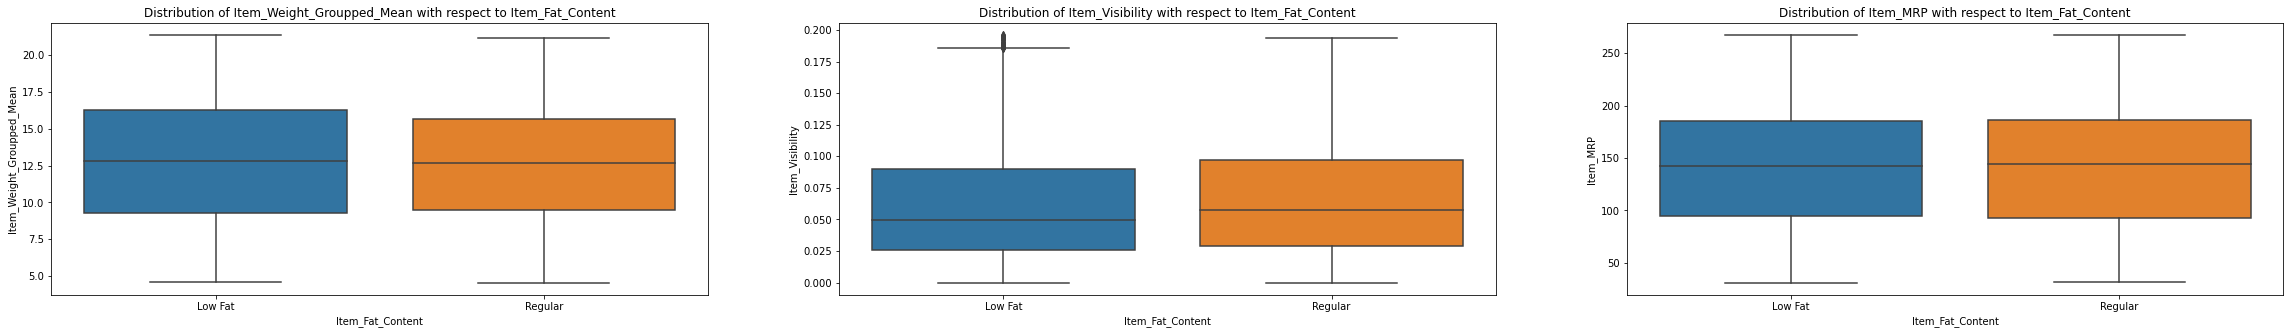

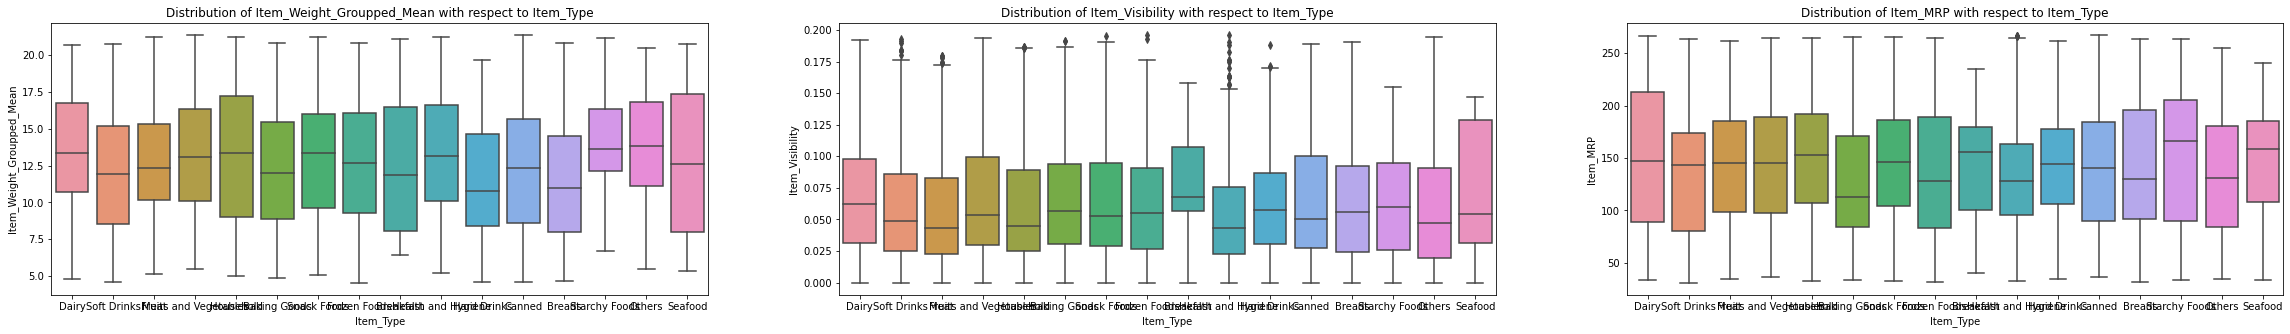

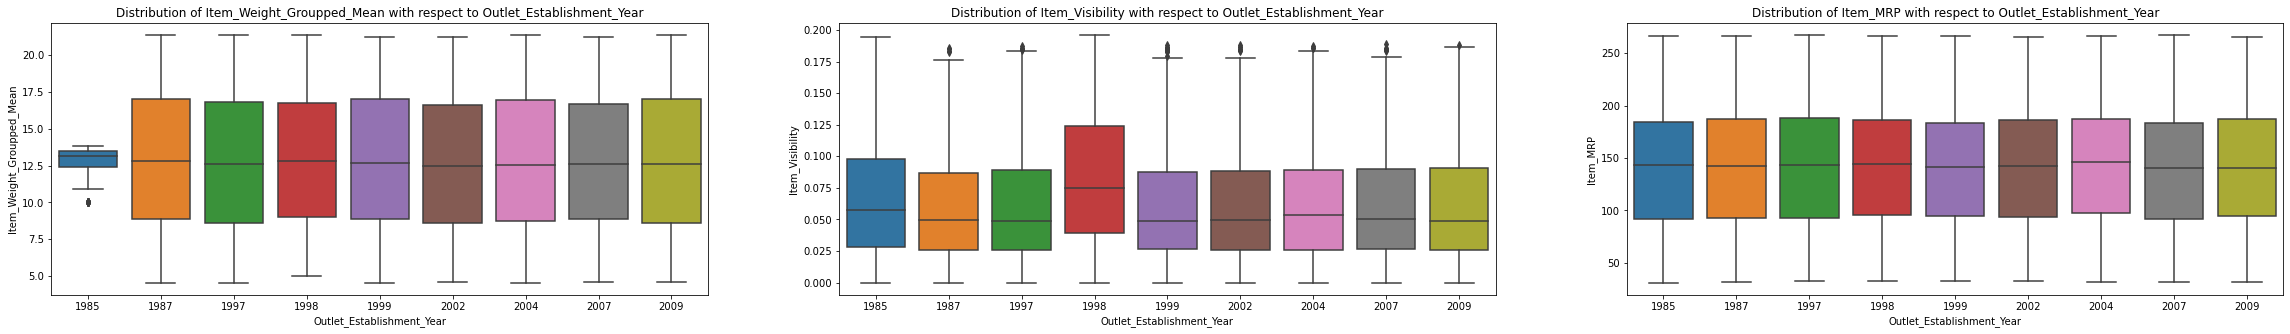

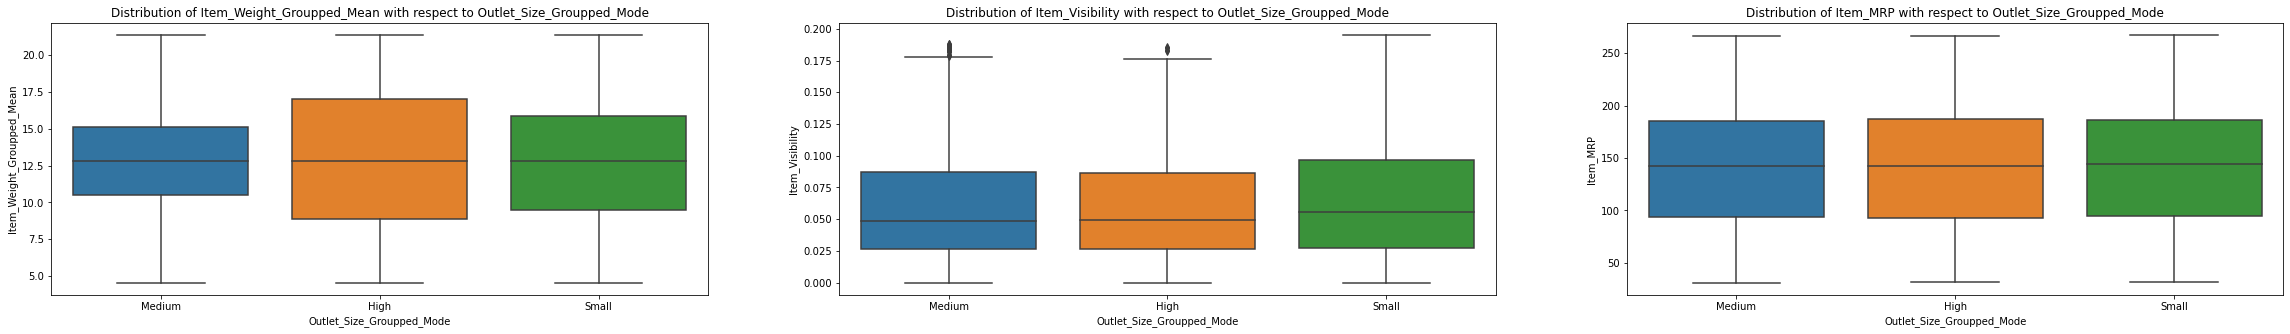

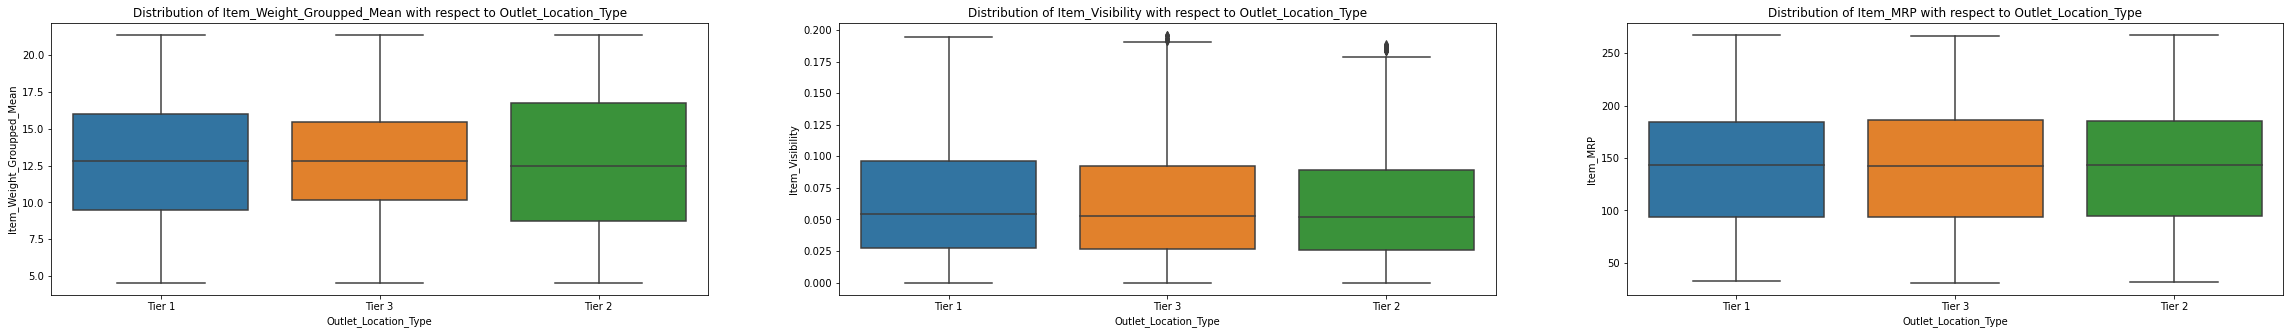

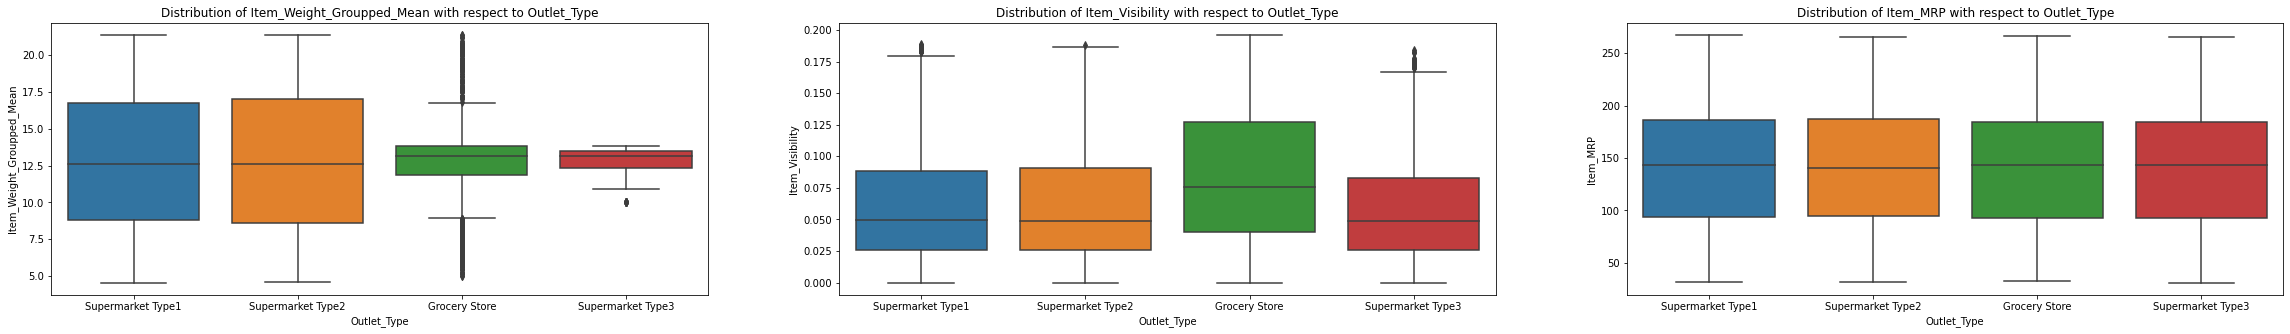

In [66]:
for cat_col in cat_cols:
    fig = plt.figure(figsize=(40,5))
    j=1
    for num_col in num_cols:
        ax = fig.add_subplot(1,len(num_cols),j)
        sns.boxplot(y= num_col, x= cat_col, data= train_data, ax= ax)
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)
        ax.set_title(f'Distribution of {num_col} with respect to {cat_col}')
        j = j+1

### Categorical Encoding

In [67]:
train_data[num_cols + cat_cols].head()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size_Groupped_Mode,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,Low Fat,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,Regular,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,Low Fat,Meat,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,Regular,Fruits and Vegetables,1998,NaN,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,Low Fat,Household,1987,High,Tier 3,Supermarket Type1


In [68]:
train_data['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8379, dtype: object

In [69]:
train_data_dum = pd.get_dummies(train_data[num_cols + cat_cols + [target]], columns=cat_cols,drop_first=True) # Since target is kept as string form above

In [70]:
train_data_dum

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Groupped_Mode_Medium,Outlet_Size_Groupped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [71]:
# Train [Original df] - Train_data [Outliers removed: new df] - Train_data_dum [Categorical encoding: new df]

In [72]:
# Bulid a Python script - Which takes the csv file as an input and provide the train_data_dum df as output.

### Data Splits 

We have train_data_dum file after preprocessing train_data,Which is a complete file with all the columns [with target column also]. We split that train_data_dum file into two 1) train_data_dum [80%] and test_data_dum [20%]. To know the accuracy of our model.We add new column predicted and then compare to the target which contains actual values and we can calculate accuracy percentage by comparing them.

Now the doubt comes, that in AnalyticsVidya we have test file also then why we can not use that file?
Because, in that test.csv file target column is empty, So that we can not compare. 

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
train_data_train, train_data_test = train_test_split(train_data_dum, test_size = 0.2, random_state = 102)

In [75]:
train_data_train.head()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Groupped_Mode_Medium,Outlet_Size_Groupped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,11.800000,0.014116,178.5344,3390.2536,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
8356,13.707177,0.117531,222.7088,4026.7584,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7554,13.707177,0.079262,81.8250,83.2250,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,10.650000,0.048687,164.1526,1808.9786,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3550,11.400328,0.016745,180.7660,3056.0220,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [76]:
train_data_test.head()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Groupped_Mode_Medium,Outlet_Size_Groupped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7702,11.850000,0.055672,50.5666,922.7988,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2469,11.350000,0.000000,103.0016,2125.2336,1,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
804,16.100000,0.024928,95.1410,3089.3120,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
214,14.650000,0.000000,161.5552,324.9104,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2962,12.027116,0.117443,257.7304,774.9912,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
x_train = train_data_train.drop(target, axis= 1)
y_train = train_data_train[target]

In [78]:
x_test = train_data_test.drop(target, axis= 1)
y_test = train_data_test[target]

In [79]:
x_train.shape

(6703, 34)

In [80]:
y_train.shape

(6703,)

In [81]:
x_test.shape

(1676, 34)

In [82]:
y_test.shape

(1676,)

For any class in sklearn:
* 1) Object creation: Create an object of the class.
* 2) Calling fit method:  Call the fit method with that object.
* 3) Calling predict method: Call other methods after fit operation- Transform, Predict, etc.

### Feature scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()

In [85]:
sc.fit(x_train[num_cols])

StandardScaler()

In [86]:
x_train[num_cols] # Input

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP
2845,11.800000,0.014116,178.5344
8356,13.707177,0.117531,222.7088
7554,13.707177,0.079262,81.8250
2101,10.650000,0.048687,164.1526
3550,11.400328,0.016745,180.7660
...,...,...,...
982,7.680000,0.118673,192.2162
4140,19.350000,0.082251,48.7034
2929,15.100000,0.052329,243.1512
2327,12.804289,0.021002,185.1924


In [87]:
sc.mean_ # Mean

array([1.28459782e+01, 6.34450837e-02, 1.41578760e+02])

In [88]:
sc.var_**0.5 # Standard deviation= under root varience

array([4.26473373e+00, 4.62418207e-02, 6.24600140e+01])

In [89]:
x_train[num_cols] = sc.transform(x_train[num_cols])

In [90]:
x_train[num_cols]

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP
2845,-0.245262,-1.066772,0.591669
8356,0.201935,1.169629,1.298912
7554,0.201935,0.342042,-0.956672
2101,-0.514916,-0.319157,0.361413
3550,-0.338978,-1.009904,0.627397
...,...,...,...
982,-1.211325,1.194318,0.810718
4140,1.525071,0.406683,-1.486957
2929,0.528526,-0.240387,1.626199
2327,-0.009775,-0.917847,0.698265


In [91]:
x_test[num_cols] = sc.transform(x_test[num_cols])

In [92]:
x_test[num_cols]

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP
7702,-0.233538,-0.168096,-1.457127
2469,-0.350779,-1.372028,-0.617630
804,0.763007,-0.832942,-0.743480
214,0.423009,-1.372028,0.319828
2962,-0.192008,1.167726,1.859616
...,...,...,...
4305,-1.656839,0.230144,1.975312
5182,1.020936,-0.824707,0.087465
2109,-0.020853,-0.599192,1.906004
2973,-1.062429,-0.601568,0.081102


In [93]:
x_train.head()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Groupped_Mode_Medium,Outlet_Size_Groupped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,-0.245262,-1.066772,0.591669,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8356,0.201935,1.169629,1.298912,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7554,0.201935,0.342042,-0.956672,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,-0.514916,-0.319157,0.361413,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3550,-0.338978,-1.009904,0.627397,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [94]:
x_test.head()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Groupped_Mode_Medium,Outlet_Size_Groupped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7702,-0.233538,-0.168096,-1.457127,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2469,-0.350779,-1.372028,-0.617630,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
804,0.763007,-0.832942,-0.743480,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
214,0.423009,-1.372028,0.319828,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2962,-0.192008,1.167726,1.859616,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
# End of Data Preprocessing

### Modeling

In [96]:
# Benchmark -> Simple linear regression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lin_reg_bm = LinearRegression() # Created object

##### Sklearn expectations:
* x -> 2D array(matrix)
* y -> 1D array(vector)
    

In [99]:
x_train['Item_MRP'].values.reshape(-1,1).shape # reshaped to 2D array

(6703, 1)

In [100]:
lin_reg_bm.fit(x_train['Item_MRP'].values.reshape(-1,1), y_train.values) # Calling fit method

LinearRegression()

##### Simple linear regression

y_train(Item_Outlet_Sales) = b0 + b1*x_train[Item_MRP]

In [101]:
b0 = lin_reg_bm.intercept_

In [102]:
b0

2218.945521139788

In [103]:
b1 = lin_reg_bm.coef_

In [104]:
b1

array([980.17492725])

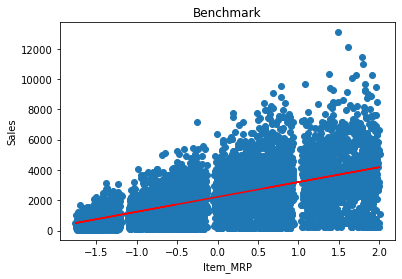

In [105]:
plt.scatter(x_train['Item_MRP'], y_train)
plt.plot(x_train['Item_MRP'], lin_reg_bm.predict(x_train['Item_MRP'].values.reshape(-1,1)),'r')
plt.xlabel('Item_MRP')
plt.ylabel('Sales')
plt.title('Benchmark')

plt.show()

In [106]:
y_pred = lin_reg_bm.predict(x_test['Item_MRP'].values.reshape(-1,1))
                            

In [107]:
y_pred

array([ 790.70637064, 1613.56036941, 1490.2052413 , ..., 4087.16290551,
       2298.4397915 , 3862.00833256])

* Actual-> y_test
* Predicted -> y_pred

* Find the error and other coef.
* Simple linear regression -> benchmarking (Use single feature)
* Multiple linear regression -> Machine learning (use multiple features)
* Modeling at scale -> Linear reg, Ridge reg, Lasso reg etc (best technique)
* Cross validation

#### Calculating Error

In [108]:
y_pred.shape

(1676,)

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [110]:
mse =  mean_squared_error(y_test, y_pred) # Mean squared error
mse

1902035.4998960264

In [111]:
rmse = mse**0.5 # Root mean square error
rmse

1379.1430309783052

In [112]:
mae = mean_absolute_error(y_test,y_pred) # Mean absolute error
mae

1017.6316815965937

#### Multiple Linear regression

In [113]:
lin_reg_mlr = LinearRegression()

In [114]:
lin_reg_mlr.fit(x_train, y_train)

LinearRegression()

In [115]:
x_train.head()

,Item_Weight_Groupped_Mean,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Groupped_Mode_Medium,Outlet_Size_Groupped_Mode_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2845,-0.245262,-1.066772,0.591669,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8356,0.201935,1.169629,1.298912,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7554,0.201935,0.342042,-0.956672,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2101,-0.514916,-0.319157,0.361413,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3550,-0.338978,-1.009904,0.627397,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [116]:
x_train.shape # Shape of input data

(6703, 34)

In [117]:
b0 = lin_reg_mlr.intercept_
b0

654.3390686161806

In [118]:
coeffs = lin_reg_mlr.coef_
coeffs

array([   2.72852549,  -20.21264712,  982.63760928,   61.62557013,
        -29.07772726,   91.89472507,   53.43355451,  -57.94260944,
        -41.32856708,   26.77357401,   27.40897915,  -24.11363548,
        -38.57227253,   28.41480233,   42.67044229,  193.36308106,
        -17.94146803,   15.49043506,  -73.93500848,   34.47186073,
        832.08044269, -880.46695545, -356.00732969,  -37.69795936,
        440.14492962,  128.86809041, -111.01723679, 1027.07895553,
       -272.25399186,  531.31506067,  537.0911905 , 1041.86003439,
       -111.01723679, 1494.10352201])

In [119]:
coeffs.shape

(34,)

In [120]:
# y_train = b0 + b1(coeffs[0]*x_train['Item_Weight_Groupped_Mean']+...)

In [121]:
y_pred_mlr = lin_reg_mlr.predict(x_test)
y_pred_mlr

array([ 900.32057827, 1858.95823991, 1644.50790139, ..., 5624.35192784,
       2517.85071213, 3588.56533817])

In [122]:
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
mse

1902035.4998960264

In [123]:
rmse_mlr = mse_mlr**0.5
rmse_mlr

1117.1782687766156

In [124]:
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mae_mlr

827.0048347133469

### Ridge & Lasso

In [125]:
from sklearn.linear_model import Ridge, Lasso

In [126]:
ridge = Ridge()
lasso = Lasso()

In [127]:
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso()

In [128]:
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)

In [129]:
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mse_ridge

1248023.9145855517

In [130]:
rmse_ridge = mse_ridge**0.5
rmse_ridge

1117.1499069442523

In [131]:
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mae_ridge

826.9427749218122

In [132]:
mse_lasso = mean_squared_error(y_test,y_pred_ridge)
mse_lasso

1248023.9145855517

In [133]:
rmse_lasso = mse_lasso**0.5
rmse_lasso

1117.1499069442523

In [134]:
mae_lasso = mean_absolute_error(y_test,y_pred_ridge)
mae_lasso

826.9427749218122

In [135]:
# Oops
from sklearn.metrics import median_absolute_error, r2_score

In [136]:
regressors = ['LinearRegression','Ridge','Lasso'] #'BayesianRidge','HuberRegressor']

In [137]:
models = []
mse = []
mae = []
mdae = []
rs = [] # R2 square

In [138]:
for regressor in regressors:
    model = eval(regressor)()
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    models.append(model)
    mse.append(mean_squared_error(y_test,y_pred))
    mae.append(mean_absolute_error(y_test,y_pred))
    mdae.append(median_absolute_error(y_test,y_pred))
    rs.append(r2_score(y_test,y_pred))

In [139]:
model_dict = {'Model': models,
             'Mean_squared error': mse,
             'Mean_absolute_error':mae,
             'Meadian_absolute_error':mdae,
             'R2_score':rs}

In [140]:
model_dict

{'Model': [LinearRegression(), Ridge(), Lasso()],
 'Mean_squared error': [1248087.2842267158,
  1248023.9145855517,
  1244010.8283676787],
 'Mean_absolute_error': [827.0048347133469,
  826.9427749218122,
  824.9737690843469],
 'Meadian_absolute_error': [615.9806671615216,
  615.6948297925313,
  620.2186859637967],
 'R2_score': [0.5688267390346493, 0.5688486311692558, 0.5702350209618314]}

### Cross Validation

In [141]:
model_df = pd.DataFrame(model_dict)
model_df

,Model,Mean_squared error,Mean_absolute_error,Meadian_absolute_error,R2_score
0,LinearRegression(),1.248087e+06,827.004835,615.980667,0.568827
1,Ridge(),1.248024e+06,826.942775,615.694830,0.568849
2,Lasso(),1.244011e+06,824.973769,620.218686,0.570235


In [142]:
model_df.sort_values(by=['R2_score','Meadian_absolute_error'],ascending=[False,True],inplace=True)

In [143]:
model_df

,Model,Mean_squared error,Mean_absolute_error,Meadian_absolute_error,R2_score
2,Lasso(),1.244011e+06,824.973769,620.218686,0.570235
1,Ridge(),1.248024e+06,826.942775,615.694830,0.568849
0,LinearRegression(),1.248087e+06,827.004835,615.980667,0.568827


In [144]:
# lasso modeling is best suited

In [145]:
# Cross validation in graphical representation

In [146]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [147]:
kf = KFold(n_splits=50)

In [148]:
cv_score = cross_val_score(estimator=lasso, X=x_train, y=y_train, cv=kf, n_jobs=12, verbose=1)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    5.3s finished


In [149]:
cv_score

array([0.54940402, 0.55561771, 0.5354519 , 0.35477504, 0.48609946,
       0.60251786, 0.58974001, 0.56514932, 0.61687311, 0.58829109,
       0.45177014, 0.53018578, 0.57176855, 0.52744872, 0.56080763,
       0.56392551, 0.53141462, 0.56599043, 0.51601543, 0.48808852,
       0.62030414, 0.56814638, 0.53080624, 0.55516608, 0.59942602,
       0.54124902, 0.5410585 , 0.59665521, 0.49710584, 0.63014518,
       0.47269698, 0.54911959, 0.47557586, 0.536859  , 0.43017062,
       0.45999165, 0.56381104, 0.5668795 , 0.64586721, 0.58915332,
       0.6057458 , 0.61114964, 0.51096916, 0.5186182 , 0.55864551,
       0.54314113, 0.53775929, 0.51086378, 0.5233672 , 0.60561887])

C:\Users\MY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


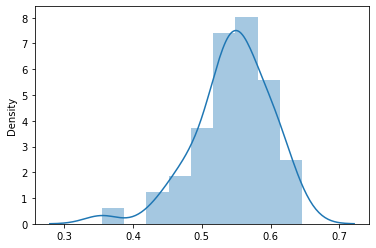

In [150]:
sns.distplot(cv_score)
plt.show()

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\MY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\MY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


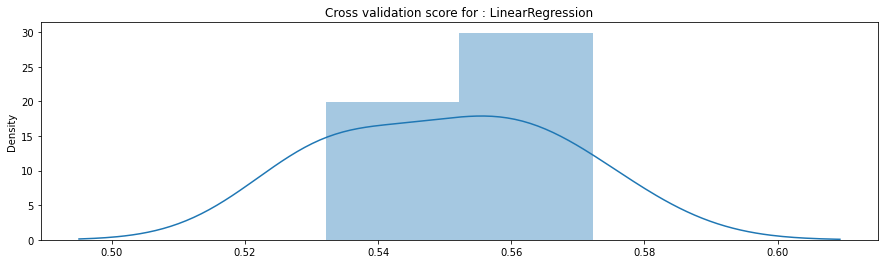

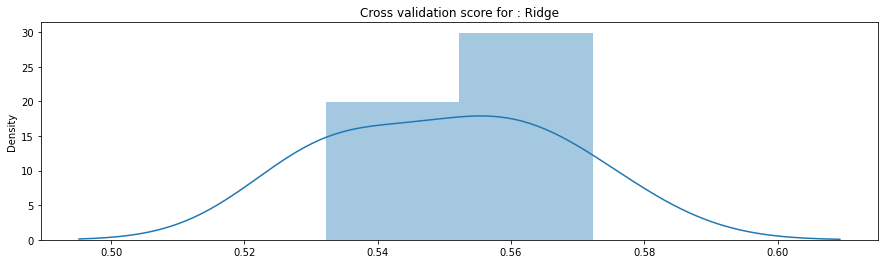

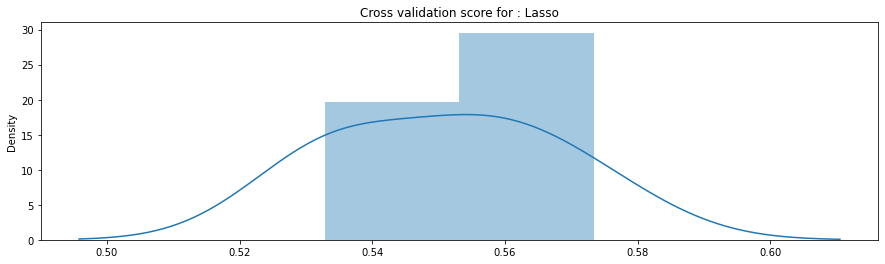

In [151]:
kf = KFold(n_splits=50)
for regressor in regressors:
    model = eval(regressor)()
    
    model.fit(x_train, y_train)
    cv_score = cross_val_score(estimator=model,
                              X = x_train,
                              y = y_train,
                              n_jobs = 12,
                              verbose = 1)
    fig =plt.figure(figsize = (15,4))
    ax = fig.add_subplot(111)
    ax= sns.distplot(cv_score)
    ax.set_title(f'Cross validation score for : {regressor}')

In [152]:
# End